In [51]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

folder = '/Users/gabriellevine/Documents/mapbox-code/basketball_analysis/'

In [18]:
data = pd.read_csv(folder +  'data_files/nba_season_data.csv')

In [5]:
data.head()

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
0,1978,NOJ,Truck Robinson,26,82,3638,15.7,0.481,NaN,0.340,...,1.1,1.1,3.6,4.0,26.33,3.0,79.0,225.0,4.0,26.0
1,1978,BUF,Randy Smith,29,82,3314,19.1,0.521,NaN,0.326,...,-2.3,7.4,1.0,2.0,29.14,6.0,75.0,180.0,1.0,29.0
2,1978,WSB,Elvin Hayes,32,81,3246,17.1,0.489,NaN,0.365,...,3.4,6.5,4.2,4.0,32.21,9.0,81.0,235.0,4.0,32.0
3,1978,BOS,Dave Cowens,29,77,3215,18.6,0.533,NaN,0.233,...,6.1,12.5,3.9,5.0,29.27,7.0,81.0,230.0,4.0,29.0
4,1978,NYK,Bob McAdoo,26,79,3182,22.0,0.567,NaN,0.412,...,2.6,10.6,3.6,5.0,26.36,5.0,81.0,210.0,4.0,26.0


In [16]:
data[['Year', 'Player']]

data.shape

data.columns

data.describe()

Index(['Year', 'Tm', 'Player', 'Age', 'G', 'MP', 'PER', 'TS%', '3PAr', 'FTr',
       ...
       'D-WORP', 'Adjusted WORP', 'Estimated Position', 'BBRef Pos',
       'Age on Feb 1', 'Yrs Experience', 'Height', 'Weight',
       'Rounded Position', 'Rounded Age'],
      dtype='object', length=109)

In [ ]:
data['Player'] = data['Player'].astype('str')

data1 = data[data['Player'] != '0']

In [45]:
data1.query('Age >= 40')

,Year,Tm,Player,Age,G,MP,PER,TS%,3PAr,FTr,...,D-WORP,Adjusted WORP,Estimated Position,BBRef Pos,Age on Feb 1,Yrs Experience,Height,Weight,Rounded Position,Rounded Age
3444,1988,LAL,Kareem Abdul-Jabbar,40,80,2308,15.8,0.570,0.001,0.298,...,0.7,2.0,4.9,5.0,40.80,18.0,86.0,225.0,5.0,41.0
3897,1989,LAL,Kareem Abdul-Jabbar,41,74,1695,12.9,0.511,0.005,0.250,...,0.3,-0.3,5.0,5.0,41.80,19.0,86.0,225.0,5.0,42.0
5954,1994,BOS,Robert Parish,40,74,1987,16.1,0.530,0.000,0.287,...,0.9,0.8,4.8,5.0,40.43,17.0,84.0,230.0,5.0,41.0
6463,1995,CHH,Robert Parish,41,81,1352,10.1,0.467,0.000,0.272,...,0.8,-0.3,4.8,5.0,41.42,18.0,84.0,230.0,5.0,42.0
6926,1996,CHH,Robert Parish,42,74,1086,13.0,0.533,0.000,0.295,...,0.7,-0.3,5.0,5.0,42.42,19.0,84.0,230.0,5.0,43.0
7089,1996,CHI,James Edwards,40,28,274,3.5,0.403,0.000,0.236,...,-0.3,0.0,4.2,5.0,40.20,18.0,84.0,225.0,4.0,40.0
7534,1997,CHI,Robert Parish,43,43,406,14.3,0.514,0.000,0.217,...,0.1,-0.2,4.6,5.0,43.43,20.0,84.0,230.0,5.0,44.0
7545,1997,TOR,John Long,40,32,370,8.9,0.499,0.291,0.239,...,-0.6,0.0,1.9,2.0,40.43,13.0,77.0,195.0,2.0,41.0
8129,1998,HOU,Charles Jones,40,24,127,7.8,0.689,0.000,0.200,...,0.1,0.0,3.6,4.0,40.83,14.0,81.0,215.0,4.0,41.0
8580,1999,PHI,Rick Mahorn,40,16,127,1.5,0.302,0.000,0.444,...,0.1,0.0,4.1,4.0,40.36,17.0,82.0,240.0,4.0,40.0


In [50]:
cols = data1.columns.tolist()

cols

#VORP, OWS, DWS, WS, WS/48, OBPM, DBPM



['Year',
 'Tm',
 'Player',
 'Age',
 'G',
 'MP',
 'PER',
 'TS%',
 '3PAr',
 'FTr',
 'ORB%',
 'DRB%',
 'TRB%',
 'AST%',
 'STL%',
 'BLK%',
 'TOV%',
 'USG%',
 '.',
 'OWS',
 'DWS',
 'WS',
 'WS/48',
 '..1',
 'OBPM',
 'DBPM',
 'BPM',
 'VORP',
 'OWS/48',
 'DWS/48',
 'Shot%',
 'Player ID',
 'Team Mar',
 'Team MP',
 'Team Gm',
 'Year 3PAr',
 'Team TS%',
 'Tm USG',
 'Tm TS W/O Plyr',
 'Reb/Vers',
 'Defense',
 'Val/Shot',
 'Offense',
 'MPG + Int',
 'RAW SPM',
 '%Min',
 'RAW Contrib',
 'Tm Sum',
 'Tm Adj',
 'BPM.1',
 'StdErr',
 'Contrib',
 'VORP.1',
 'Reb/Vers.1',
 'Val/Shot.1',
 'Offense.1',
 'Defense.1',
 'MPG',
 'Raw OBPM',
 'Contrib.1',
 'Tm Ortg',
 'Tm Sum.1',
 'Tm Adj.1',
 'Tm DRtg',
 'OBPM.1',
 'OStdErr',
 'Ocontrib',
 'OVORP',
 'DBPM.1',
 'DStdErr',
 'Dcontrib',
 'DVORP',
 'Sum SPM',
 '%Min.1',
 'MPG.1',
 'ReMPG',
 'BPM.2',
 'Contrib.2',
 'VORP.2',
 'VORP-Gm',
 'O-BPM',
 'Ocontrib.1',
 'OVORP.1',
 'OVORP-Gm',
 'D-BPM',
 'Dcontrib.1',
 'DVORP.1',
 'DVORP-Gm',
 'Production',
 'Prod-Gm',
 'Exp 

In [52]:
data2016 = data1[data1.Year == 2016]


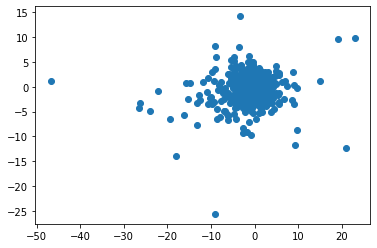

In [54]:
plt.scatter(data2016.OBPM, data2016.DBPM)